1. Importing libraries

In [195]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, os, warnings
warnings.filterwarnings('ignore')

2. Reading the data 

In [196]:
PROJECT_DIR  = "/Users/abhisheksaurav/Desktop/real_estate_project/"
DATA_DIR = "Data Collection/Data/City/chandigarh/cleaned_data"

In [197]:
def get_data(name):
    file_name = "{}.csv".format(name)
    file_path = os.path.join(PROJECT_DIR, DATA_DIR, file_name)
    return pd.read_csv(file_path)

In [198]:
data = get_data("gurgaon_properties_cleaned_v2")

3. Outliers Detection and Removal

In [199]:
data.sample(5)

,property type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxary_score
2193,house,independent,sector 8,0.22,7407.0,297.0,Carpet area: 33 (27.59 sq.m.),2,2,2,...,NaN,NaN,33.0,0,0,0,0,0,0,0
1633,flat,pioneer park,sector 61,2.04,14623.0,1395.0,Super Built up area 1795(166.76 sq.m.)Built Up...,3,3,3+,...,1795.0,1595.0,1395.0,0,1,0,0,0,2,165
2975,house,independent,sector 12,2.50,13888.0,1800.0,Plot area 1800(167.23 sq.m.),9,5,2,...,NaN,1800.0,NaN,0,0,0,1,0,0,8
2100,flat,m3m soulitude,sector 89,1.25,8784.0,1423.0,Built Up area: 1423 (132.2 sq.m.)Carpet area: ...,3,3,No,...,NaN,1423.0,1190.0,0,0,0,0,0,0,61
2512,flat,sare green parc phase 3,sector 92,1.08,5150.0,2097.0,Super Built up area 2090(194.17 sq.m.),4,4,2,...,2090.0,NaN,NaN,0,1,0,0,0,0,107


In [200]:
data.shape

(3942, 23)

3.1 price

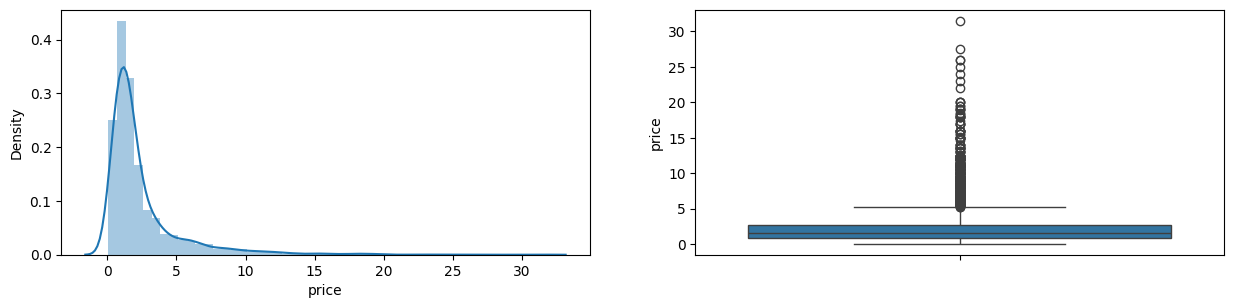

Skewness: 3.36
Kurtosis: 15.79


In [201]:

plt.figure(figsize=(15, 7))
plt.subplot(2, 2, 1)
sns.distplot(data.price)
plt.subplot(2,2,2)
sns.boxplot(data.price)
plt.show()

print(f"Skewness: {data.price.skew():.2f}")
print(f"Kurtosis: {data.price.kurtosis():.2f}")

In [202]:
# test for normality 

import scipy
import scipy.stats

alpha = 0.05
# shapiro wilk test 
sw_test, pvalue = scipy.stats.shapiro(data.price.dropna().values)
print(f"Test Statistic for Shapiro Wilk Test is {sw_test:.2f}")
print(f"p-value for the shapiro wilk test is: {pvalue :.2f}")
if pvalue < alpha:
    print("Null hypothesis rejected, data is not normal")
else:
    print("Fail to reject Null Hypothesis, data is normal")

def shapiro_normality(data, col):

    alpha = 0.05
    # shapiro wilk test 
    sw_test, pvalue = scipy.stats.shapiro(data[col].dropna().values)
    print(f"Test Statistic for Shapiro Wilk Test is {sw_test:.2f}")
    print(f"p-value for the shapiro wilk test is: {pvalue :.2f}")
    if pvalue < alpha:
        print("Null hypothesis rejected, data is not normal")
    else:
        print("Fail to reject Null Hypothesis, data is normal")



Test Statistic for Shapiro Wilk Test is 0.64
p-value for the shapiro wilk test is: 0.00
Null hypothesis rejected, data is not normal


Observation: 
1. Historgram and box plot both are indicating that properties above 5crores are outliers 

In [203]:
# outlier analysis

q1 = data.price.quantile(0.25)
q3 = data.price.quantile(0.75)

iqr = q3 - q1 

lower_bound, upper_bound = q1- (1.5*iqr), q3 + (1.5*iqr)
print(f"Lower Limit is: {lower_bound} and Upper limit is  {upper_bound}")


def outlier_col(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)

    iqr = q3 - q1 

    lower_bound, upper_bound = q1- (1.5*iqr), q3 + (1.5*iqr)
    print(f"Lower Limit is: {lower_bound} and Upper limit is  {upper_bound}")


Lower Limit is: -1.725 and Upper limit is  5.275


In [204]:
# outlier filtering 

price_outliers = (
    data[
        (
        data
        .price < lower_bound
        ) | 
        (
            data 
            .price > upper_bound
        )

    ]
)

In [205]:
price_outliers.shape

(438, 23)

In [206]:
price_outliers.price.describe()

count    438.000000
mean       9.134224
std        4.072638
min        5.300000
25%        6.250000
50%        7.945000
75%       10.550000
max       31.500000
Name: price, dtype: float64

On the basis of price column we can say that there are some genuine price outliers but there are some data errors as well. 

price_per_sq_ft

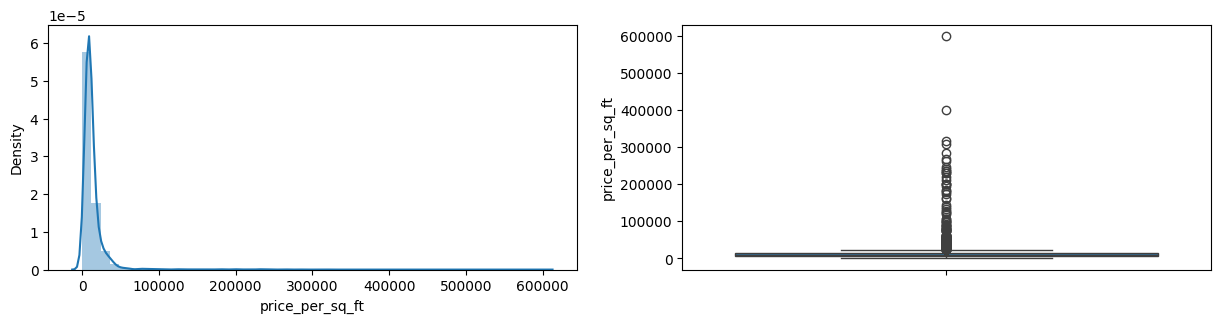

Test Statistic for Shapiro Wilk Test is 0.30
p-value for the shapiro wilk test is: 0.00
Null hypothesis rejected, data is not normal


In [207]:
plt.figure(figsize=(15, 7))
plt.subplot(2, 2, 1)
sns.distplot(data.price_per_sq_ft)
plt.subplot(2, 2, 2)
sns.boxplot(data.price_per_sq_ft)
plt.show()

shapiro_normality(data, 'price_per_sq_ft')

In [208]:
outlier_col(data, 'price_per_sq_ft')

Lower Limit is: -3597.875 and Upper limit is  24093.125


In [209]:

price_per_sq_ft_outliers = (
    data[
        (data.price_per_sq_ft < -3597.875) | (data.price_per_sq_ft > 24093.125)
    ]
)

In [210]:
price_per_sq_ft_outliers.shape

(379, 23)

In [211]:
price_per_sq_ft_outliers.price_per_sq_ft.describe()

count       379.000000
mean      52668.216359
std       59428.053286
min       24155.000000
25%       27778.000000
50%       33333.000000
75%       42222.000000
max      600000.000000
Name: price_per_sq_ft, dtype: float64

In [212]:
price_per_sq_ft_outliers.sample(3)

,property type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxary_score
3729,house,independent,sector 25,16.0,26667.0,6000.0,Built Up area: 6000 (557.42 sq.m.),6,5,2,...,NaN,6000.0,NaN,0,0,0,0,0,0,0
2908,house,independent,sector 9,7.0,28283.0,2475.0,Plot area 275(229.94 sq.m.),7,7,3+,...,NaN,2475.0,NaN,1,1,1,1,0,1,151
2191,flat,birla navya,sector 63,3.5,25925.0,1350.0,Carpet area: 1350 (125.42 sq.m.),3,3,3,...,NaN,NaN,1350.0,0,0,0,0,0,0,38


So actually what's happening here is that price_per_sq_ft is calculated by dividing the price with area. But some of these area are actually is square yards due to which price per square feet is exploding. 
- on furthur analyis it is found that area with less than 1000 are actually in square yards. so we need to convert those square yard areas to square feets. 

In [213]:
price_per_sq_ft_outliers['area'] = (
    price_per_sq_ft_outliers['area']
    .apply(lambda x: x*9 if x < 1000 else x)
)

In [214]:
price_per_sq_ft_outliers['price_per_sq_ft'] = (
    round(((price_per_sq_ft_outliers['price']) / (price_per_sq_ft_outliers['area']))* 10000000)
)

In [215]:
price_per_sq_ft_outliers.price_per_sq_ft.describe()

count      379.000000
mean     28479.298153
std      12545.901105
min       2689.000000
25%      24565.500000
50%      29074.000000
75%      35200.500000
max      82540.000000
Name: price_per_sq_ft, dtype: float64

In [216]:
# updating the outlier values in the original dataframe

data.update(price_per_sq_ft_outliers)

In [217]:
def num_col_analysis(data, col):
    plt.figure(figsize=(15, 7))
    plt.subplot(2, 2, 1)
    sns.distplot(data[col])
    plt.subplot(2,2,2)
    sns.boxplot(data[col])
    plt.show()
    print("="*50)
    print()

    print(f"Skewness: {data[col].skew():.2f}")
    print(f"Kurtosis: {data[col].kurtosis():.2f}")
    print("="*50)
    print()
    print(round(data[col].describe()))
    print("="*50)
    print()


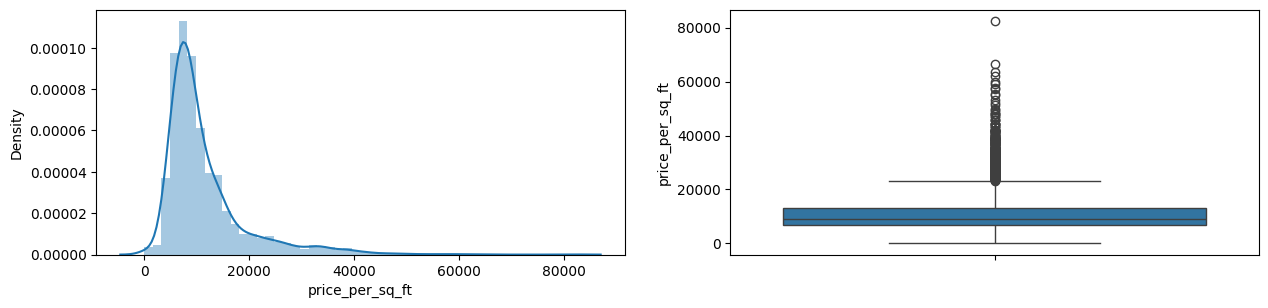


Skewness: 2.46
Kurtosis: 8.28

count     3922.0
mean     11467.0
std       7930.0
min          2.0
25%       6702.0
50%       8888.0
75%      13299.0
max      82540.0
Name: price_per_sq_ft, dtype: float64

Test Statistic for Shapiro Wilk Test is 0.76
p-value for the shapiro wilk test is: 0.00
Null hypothesis rejected, data is not normal


In [218]:
num_col_analysis(data, 'price_per_sq_ft')
shapiro_normality(data, 'price_per_sq_ft')

In [219]:
data[data.price_per_sq_ft > 50000].shape

(13, 23)

So there are 13 values which are significantly higher than others. so dropping those rows

In [220]:
data = (
    data[data.price_per_sq_ft <= 50000]
)

In [221]:
data.shape

(3909, 23)

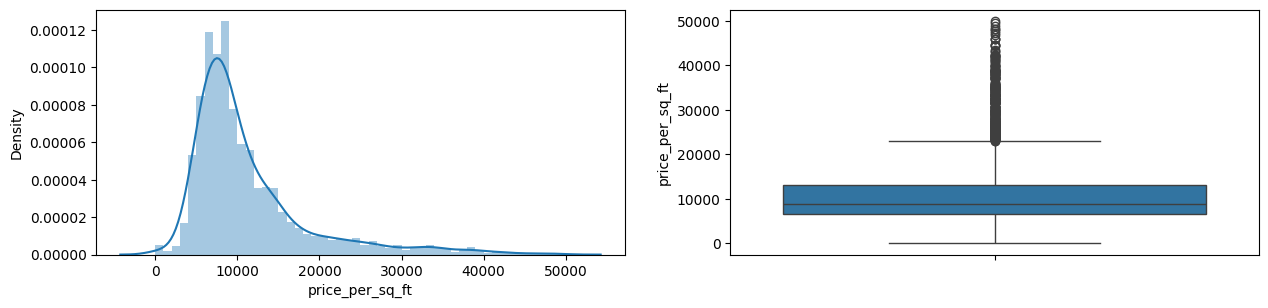


Skewness: 2.07
Kurtosis: 4.82

count     3909.0
mean     11306.0
std       7424.0
min          2.0
25%       6692.0
50%       8878.0
75%      13224.0
max      50000.0
Name: price_per_sq_ft, dtype: float64

Test Statistic for Shapiro Wilk Test is 0.78
p-value for the shapiro wilk test is: 0.00
Null hypothesis rejected, data is not normal


In [222]:
num_col_analysis(data, 'price_per_sq_ft')
shapiro_normality(data, 'price_per_sq_ft')

So, now the data points above the whisker is high in numbers so we are not considering it as an outliers. 

area

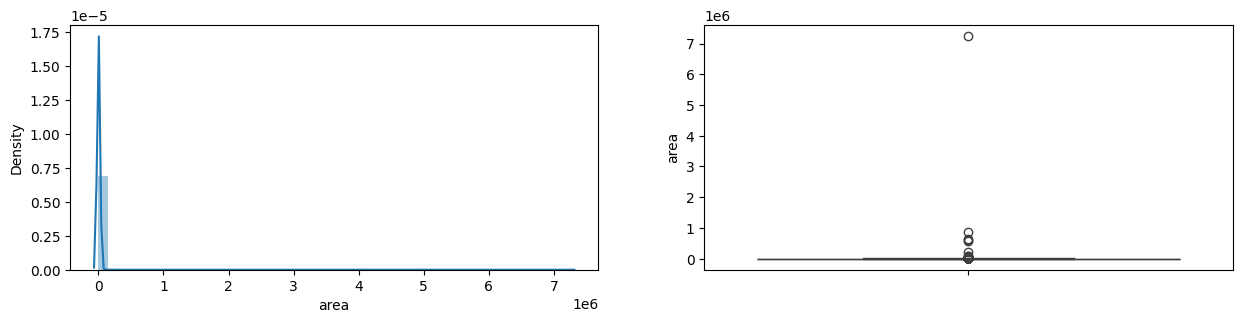


Skewness: 59.37
Kurtosis: 3632.83

count       3909.0
mean        4728.0
std       118065.0
min          145.0
25%         1230.0
50%         1733.0
75%         2320.0
max      7250000.0
Name: area, dtype: float64



In [223]:
num_col_analysis(data, 'area')

In [224]:
round(data['area'].describe(),2)

count       3909.00
mean        4728.19
std       118064.85
min          145.00
25%         1230.00
50%         1733.00
75%         2320.00
max      7250000.00
Name: area, dtype: float64

In [225]:
data[data.area > 100000]

,property type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxary_score
506,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2,2,1,...,NaN,NaN,514396.0,0,0,0,0,0,0,44
860,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2,2,1,...,NaN,NaN,607936.0,1,0,0,0,1,0,65
1234,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2,2,2,...,NaN,NaN,569243.0,0,0,0,0,0,0,76
1553,house,independent,sector 37,1.45,2.0,7250000.0,Plot area 200(809372 sq.m.),4,3,3+,...,NaN,200.0,NaN,0,0,0,0,0,0,0
2947,flat,hcbs sports ville,sector 163,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2,2,2,...,NaN,737147.0,NaN,0,0,0,0,0,1,44
3911,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6,5,3+,...,NaN,2.0,NaN,1,1,0,1,1,2,0


- These rows have incorrect data as the prices are very low in comparison to the area. so we are removing these properties. 

In [226]:
data = data[data.area < 100000]

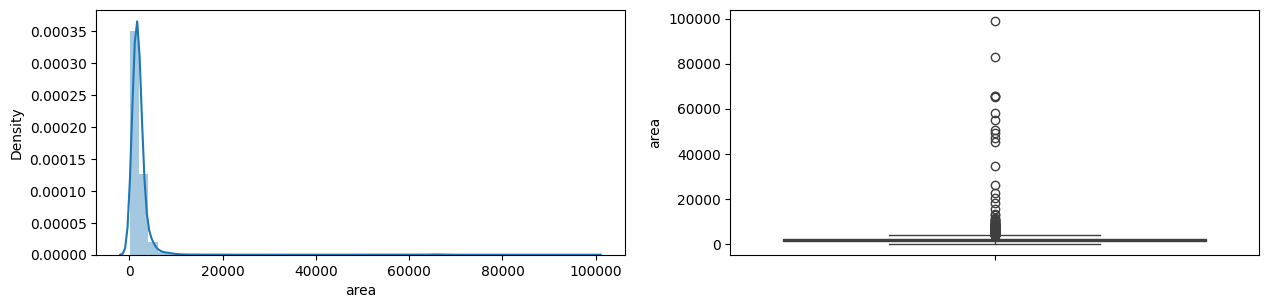


Skewness: 16.15
Kurtosis: 319.46

count     3903.0
mean      2130.0
std       3621.0
min        145.0
25%       1230.0
50%       1730.0
75%       2310.0
max      98978.0
Name: area, dtype: float64



In [227]:
num_col_analysis(data, 'area')

In [228]:
# checking for the properties which has area more than 10000 square feet. 

data[data['area']> 10000].sort_index()

,property type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxary_score
157,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,...,NaN,NaN,64529.00,1,0,0,0,0,0,15
338,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,...,NaN,NaN,58141.00,0,0,0,0,0,0,15
530,house,ganpati heights apartment,sector 8,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,...,NaN,115.0,NaN,0,0,0,0,1,0,7
635,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,...,NaN,5800.0,5200.00,0,1,1,0,0,2,109
726,house,unitech aspen greens,sector 50,6.95,4490.0,15479.0,Plot area 240(200.67 sq.m.)Built Up area: 2160...,3,3,1,...,NaN,2160.0,1720.00,0,1,0,0,0,0,160
801,house,independent,sector 57,6.25,2778.0,22498.0,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,9,9,3+,...,NaN,2660.0,2500.00,0,1,0,0,0,2,61
1273,flat,rof ananda,sector 95,0.21,61.0,34426.0,Carpet area: 34401 (3195.96 sq.m.),1,1,1,...,NaN,NaN,34401.00,0,0,0,0,0,0,68
1697,house,independent,sector 43,5.50,2716.0,20250.0,Plot area 215(179.77 sq.m.)Built Up area: 2850...,8,7,3+,...,NaN,2850.0,2250.00,1,1,0,1,1,2,123
1808,house,independent,sector 48,5.50,5093.0,10799.0,Plot area 1200(1003.35 sq.m.)Built Up area: 35...,3,3,3+,...,NaN,3500.0,NaN,1,1,0,1,1,0,49
1897,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,...,NaN,11286.0,NaN,1,1,0,1,1,2,42


In [229]:
data.drop(index=[157, 338, 1273, 2016, 2175, 3150, 3162, 3225], inplace= True)

In [230]:
data[data['area'] > 10000].sort_values(by = 'area', ascending= False)

,property type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxary_score
2739,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,...,NaN,NaN,11000.00,0,1,1,1,0,2,60
530,house,ganpati heights apartment,sector 8,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,...,NaN,115.0,NaN,0,0,0,0,1,0,7
2688,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,...,NaN,NaN,7250.00,0,0,0,0,0,0,0
2750,house,independent,sector 51,5.50,1087.0,50598.0,Plot area 5620(4699.04 sq.m.)Built Up area: 82...,8,8,2,...,NaN,8260.0,4860.00,0,0,0,1,0,2,49
635,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,...,NaN,5800.0,5200.00,0,1,1,0,0,2,109
2847,house,independent,sector 3,1.45,557.0,26032.0,Plot area 26000(2415.48 sq.m.),4,4,2,...,NaN,26000.0,NaN,0,1,0,1,0,0,62
801,house,independent,sector 57,6.25,2778.0,22498.0,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,9,9,3+,...,NaN,2660.0,2500.00,0,1,0,0,0,2,61
1697,house,independent,sector 43,5.50,2716.0,20250.0,Plot area 215(179.77 sq.m.)Built Up area: 2850...,8,7,3+,...,NaN,2850.0,2250.00,1,1,0,1,1,2,123
3871,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,...,NaN,NaN,18122.00,1,0,0,1,1,2,44
726,house,unitech aspen greens,sector 50,6.95,4490.0,15479.0,Plot area 240(200.67 sq.m.)Built Up area: 2160...,3,3,1,...,NaN,2160.0,1720.00,0,1,0,0,0,0,160


In [231]:
data.loc[2739, 'area'] = 11000.00
data.loc[530, 'area'] = 115.0 * 9 
data.loc[2688, 'area'] = 7250.00
data.loc[2750, 'area'] = 8260.0
data.loc[635, 'area'] = 5800.0 
data.loc[801, 'area'] = 2660.0
data.loc[1697, 'area'] = 2850.0
data.loc[726, 'area'] = 2160.0
data.loc[2098, 'area'] = 1175.11
data.loc[1808, 'area'] = 3500.0
data.loc[1897, 'area'] = 11286.0


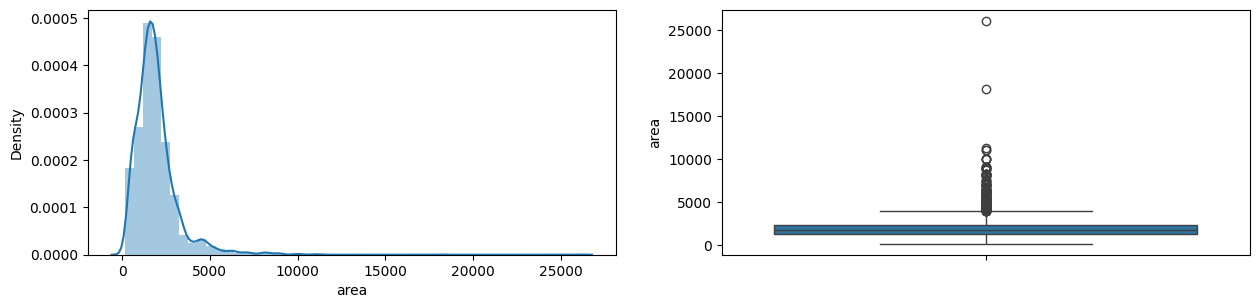


Skewness: 4.07
Kurtosis: 42.70

count     3895.0
mean      1937.0
std       1305.0
min        145.0
25%       1225.0
50%       1728.0
75%       2300.0
max      26032.0
Name: area, dtype: float64



In [232]:
num_col_analysis(data, 'area')

In [233]:
data = data[data.area < 15000]

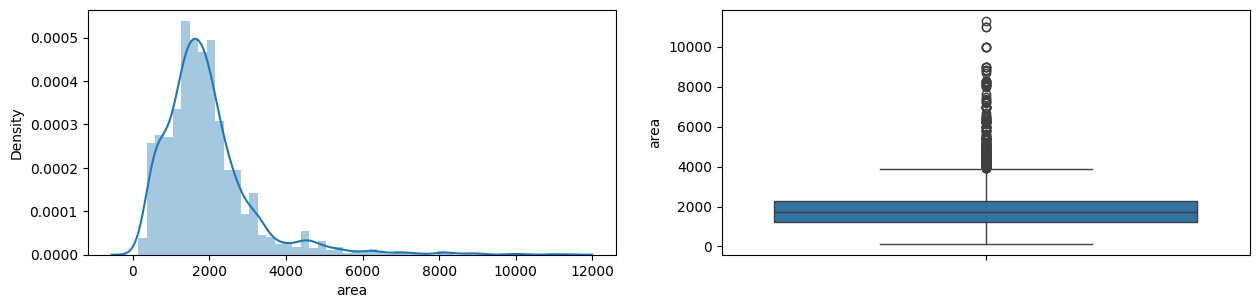


Skewness: 2.43
Kurtosis: 9.81

count     3893.0
mean      1927.0
std       1219.0
min        145.0
25%       1225.0
50%       1728.0
75%       2300.0
max      11286.0
Name: area, dtype: float64



In [234]:
num_col_analysis(data, 'area')

In [235]:
data.area.describe()

count     3893.000000
mean      1926.875446
std       1219.416853
min        145.000000
25%       1225.000000
50%       1728.000000
75%       2300.000000
max      11286.000000
Name: area, dtype: float64

bedRoom

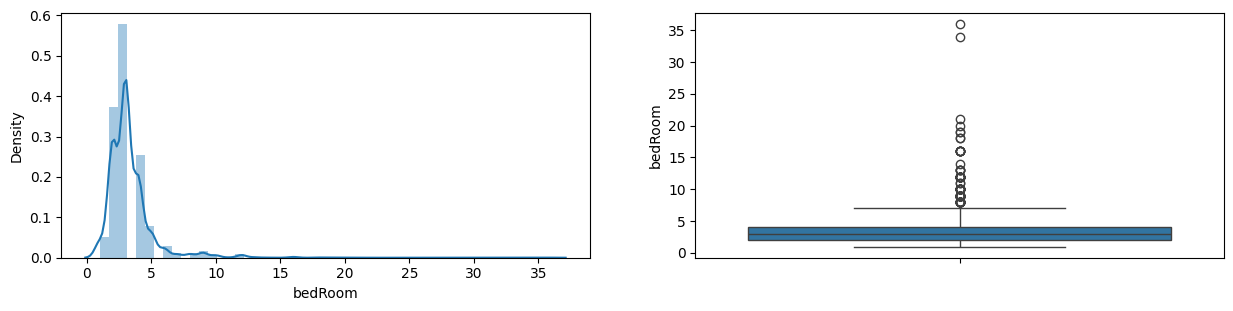


Skewness: 4.93
Kurtosis: 49.31

count    3893.0
mean        3.0
std         2.0
min         1.0
25%         2.0
50%         3.0
75%         4.0
max        36.0
Name: bedRoom, dtype: float64



In [236]:
num_col_analysis(data, 'bedRoom')

In [237]:
data.bedRoom.describe()

count    3893.000000
mean        3.331621
std         1.943900
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        36.000000
Name: bedRoom, dtype: float64

In [238]:
data[data.bedRoom > 10].sort_values(by = 'bedRoom', ascending= False).head(5)

,property type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxary_score
2883,house,independent,sector 12,2.25,6944.0,3240.0,Plot area 360(301.01 sq.m.),36,36,2,...,NaN,3240.0,NaN,0,1,0,0,0,0,7
2921,house,manohar nagar,sector 11,5.60,12444.0,4500.0,Plot area 500(418.06 sq.m.)Built Up area: 500 ...,34,34,3+,...,NaN,500.0,NaN,0,0,0,0,0,2,0
2534,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21,21,3+,...,NaN,1161.0,NaN,0,1,0,0,0,1,49
3554,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20,20,3+,...,NaN,1152.0,NaN,0,1,0,0,0,1,22
625,house,independent,sector 17,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19,17,3,...,NaN,1622.0,NaN,1,1,1,1,0,0,74


In [239]:
# removing these rows
data =data[data.bedRoom <= 10]
data.shape

(3847, 23)

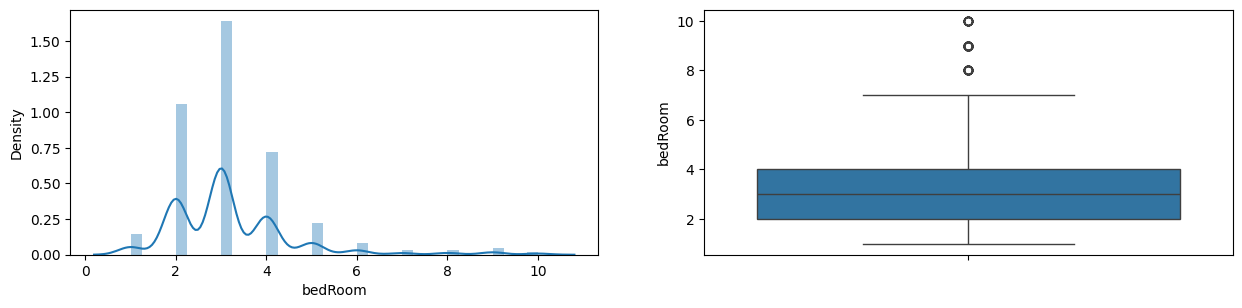


Skewness: 1.93
Kurtosis: 5.77

count    3847.0
mean        3.0
std         1.0
min         1.0
25%         2.0
50%         3.0
75%         4.0
max        10.0
Name: bedRoom, dtype: float64



In [240]:
num_col_analysis(data, 'bedRoom')

In [241]:
data.bedRoom.describe()

count    3847.000000
mean        3.196517
std         1.404383
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

bathroom

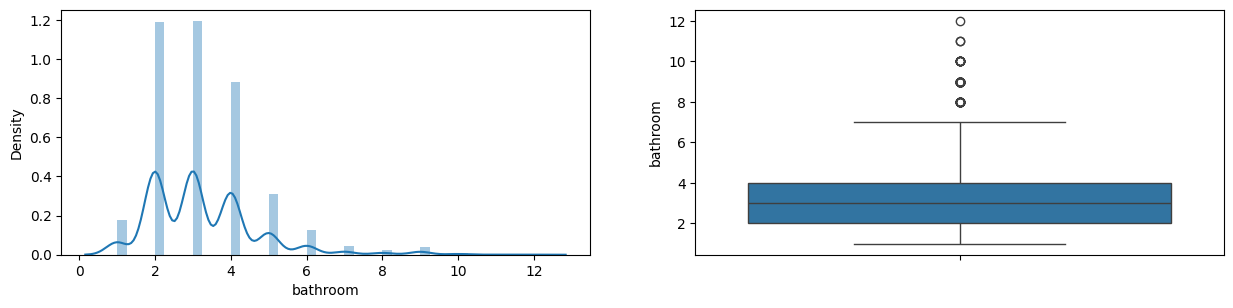


Skewness: 1.48
Kurtosis: 3.72

count    3847.0
mean        3.0
std         1.0
min         1.0
25%         2.0
50%         3.0
75%         4.0
max        12.0
Name: bathroom, dtype: float64



In [242]:
num_col_analysis(data, 'bathroom')

In [243]:
data[data.bathroom > 10].sort_values(by = 'bathroom', ascending= False)

,property type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxary_score
2214,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9,12,3+,...,NaN,6390.0,NaN,0,1,0,0,0,2,146
2677,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8,11,3+,...,NaN,5000.0,NaN,1,1,0,1,1,2,39
2876,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10,11,3+,...,NaN,7000.0,NaN,0,0,0,1,0,1,38


super_built_up_area

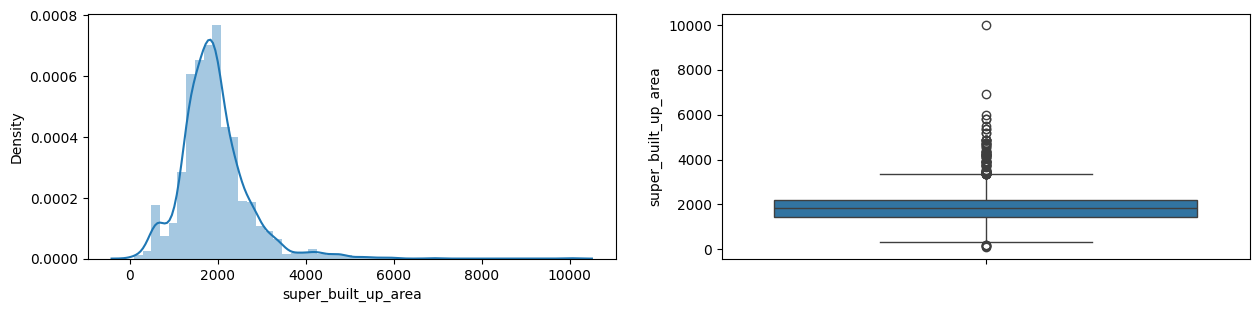


Skewness: 1.81
Kurtosis: 9.95

count     1934.0
mean      1918.0
std        768.0
min         89.0
25%       1457.0
50%       1825.0
75%       2215.0
max      10000.0
Name: super_built_up_area, dtype: float64

Test Statistic for Shapiro Wilk Test is 0.89
p-value for the shapiro wilk test is: 0.00
Null hypothesis rejected, data is not normal


In [244]:
num_col_analysis(data, 'super_built_up_area')
shapiro_normality(data, 'super_built_up_area')

In [245]:
data[data['super_built_up_area'] > 6000]

,property type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxary_score
1885,flat,krrish provence estate,sector 2,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5,6,3+,...,10000.0,NaN,NaN,0,1,0,1,1,0,49
2632,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4,4,3+,...,6926.0,NaN,NaN,0,1,0,0,0,2,140


built_up_area

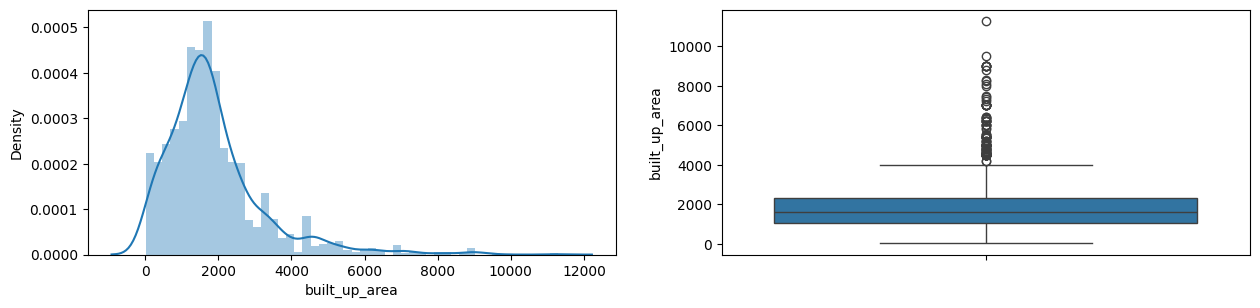


Skewness: 2.01
Kurtosis: 6.30

count     1746.0
mean      1879.0
std       1380.0
min         14.0
25%       1054.0
50%       1607.0
75%       2300.0
max      11286.0
Name: built_up_area, dtype: float64



In [246]:
num_col_analysis(data, 'built_up_area')

In [248]:
data[data['built_up_area'] > 10000]

,property type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxary_score
1897,house,independent,sector 43,27.5,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,...,NaN,11286.0,NaN,1,1,0,1,1,2,42


carpet_area

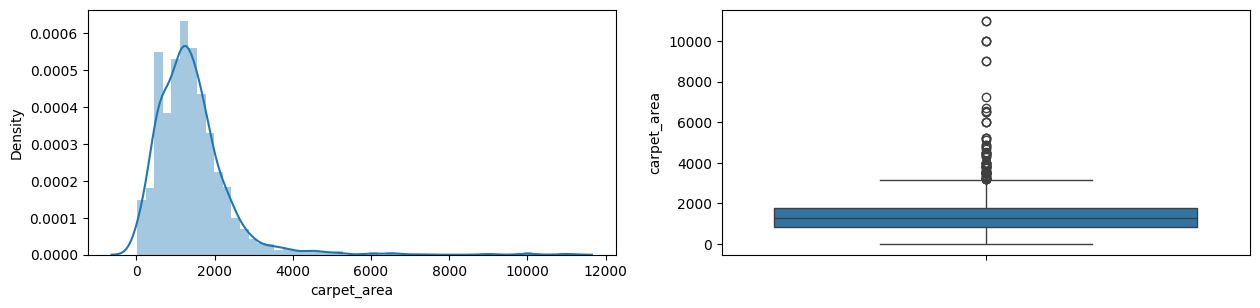


Skewness: 3.45
Kurtosis: 23.31

count     1978.0
mean      1416.0
std        987.0
min         15.0
25%        822.0
50%       1262.0
75%       1760.0
max      11000.0
Name: carpet_area, dtype: float64



In [249]:
num_col_analysis(data, 'carpet_area')

In [250]:
data[data['carpet_area'] > 10000]

,property type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxary_score
2739,house,independent,sector 26,18.4,1859.0,11000.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,...,NaN,NaN,11000.0,0,1,1,1,0,2,60
3014,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,...,NaN,NaN,11000.0,0,1,0,0,0,0,60


luxary_scorea

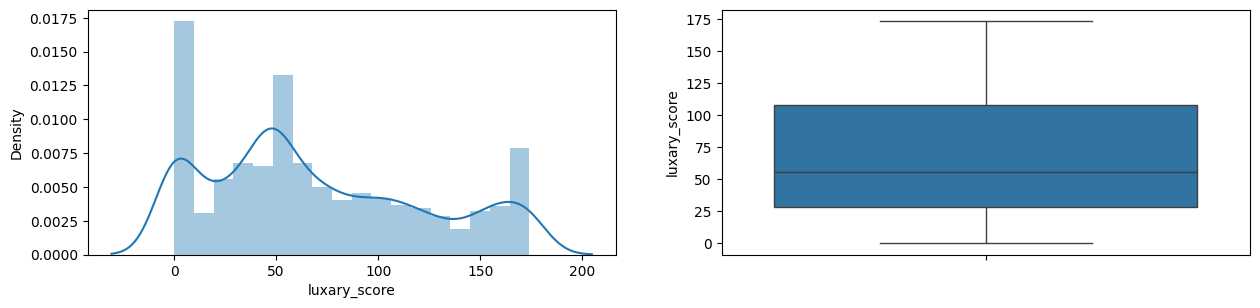


Skewness: 0.49
Kurtosis: -0.85

count    3847.0
mean       70.0
std        53.0
min         0.0
25%        28.0
50%        56.0
75%       108.0
max       174.0
Name: luxary_score, dtype: float64



In [251]:
num_col_analysis(data, 'luxary_score')

In [252]:
data.shape

(3847, 23)

In [255]:
# updating the price_per_sq_ft since the area has been updated during the outlier treatment process 

data['price_per_sq_ft'] = round((data['price']*10000000) /(data['area']))

In [256]:
data.sample(5)

,property type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxary_score
1676,flat,professors enclave cghs,sector 56,1.55,7750.0,2000.0,Super Built up area 2000(185.81 sq.m.),3,3,3+,...,2000.0,NaN,NaN,0,1,0,0,0,2,49
2508,flat,signature the roselia,sector 95,0.48,7164.0,670.0,Carpet area: 670 (62.25 sq.m.),2,2,2,...,NaN,NaN,670.0,0,0,0,0,0,0,16
489,house,eldeco mansionz,sector 48,5.15,18885.0,2727.0,Plot area 303(253.35 sq.m.)Built Up area: 302 ...,5,7,3,...,NaN,302.0,300.0,0,1,0,1,0,2,145
589,flat,krrish florence estate,sector 70,1.30,5601.0,2321.0,Built Up area: 1865 (173.26 sq.m.),3,3,3,...,NaN,1865.0,NaN,0,0,0,0,0,2,61
2000,flat,ireo the corridors,sector 67,1.50,11111.0,1350.0,Carpet area: 1350 (125.42 sq.m.),2,2,2,...,NaN,NaN,1350.0,0,0,1,0,0,2,38


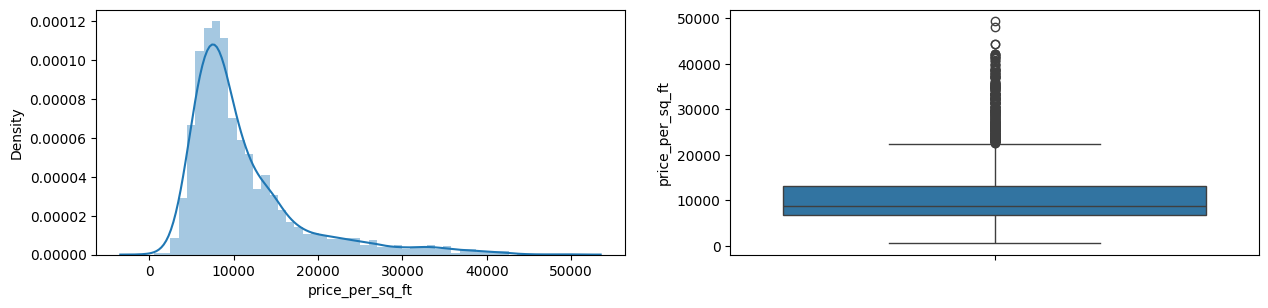


Skewness: 2.00
Kurtosis: 4.43

count     3847.0
mean     11152.0
std       6936.0
min        544.0
25%       6722.0
50%       8879.0
75%      13086.0
max      49500.0
Name: price_per_sq_ft, dtype: float64



In [257]:
num_col_analysis(data, 'price_per_sq_ft')

In [260]:
data[data['price_per_sq_ft'] > 42000].sort_values(by = 'price_per_sq_ft', ascending= False)

,property type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxary_score
1481,house,independent,sector 105,9.9,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2,2,2,...,NaN,2000.0,1800.0,0,0,0,0,0,0,0
2502,house,sushant lok 1 builder floors,sector 43,13.0,48148.0,2700.0,Plot area 300(250.84 sq.m.),3,3,3+,...,NaN,2700.0,NaN,0,0,0,1,0,2,7
3862,house,independent,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,...,NaN,4500.0,NaN,0,1,0,1,0,1,97
3888,house,independent,sector 55,5.0,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9,9,3+,...,NaN,115.0,100.0,0,0,0,0,1,2,44
1451,house,independent,sector 43,9.5,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5,5,3+,...,NaN,300.0,250.0,0,1,0,1,0,2,88
3741,house,independent,sector 26,19.0,42222.0,4500.0,Plot area 500(418.06 sq.m.),6,8,3+,...,NaN,4500.0,NaN,1,1,1,1,0,2,103
1084,house,independent,sector 28,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4,5,3+,...,NaN,2844.0,NaN,0,1,1,1,0,2,60
970,house,dlf city plots,sector 26,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6,6,3,...,NaN,4518.0,NaN,1,1,0,0,0,2,121
